In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('penguins_size.csv')

In [4]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [9]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [10]:
df = df.dropna()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [12]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [13]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [14]:
df[df['sex'] == '.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [16]:
df[df['species'] == 'Gentoo'].groupby(['sex']).describe().transpose()

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [17]:
df.at[336,'sex'] = 'FEMALE'

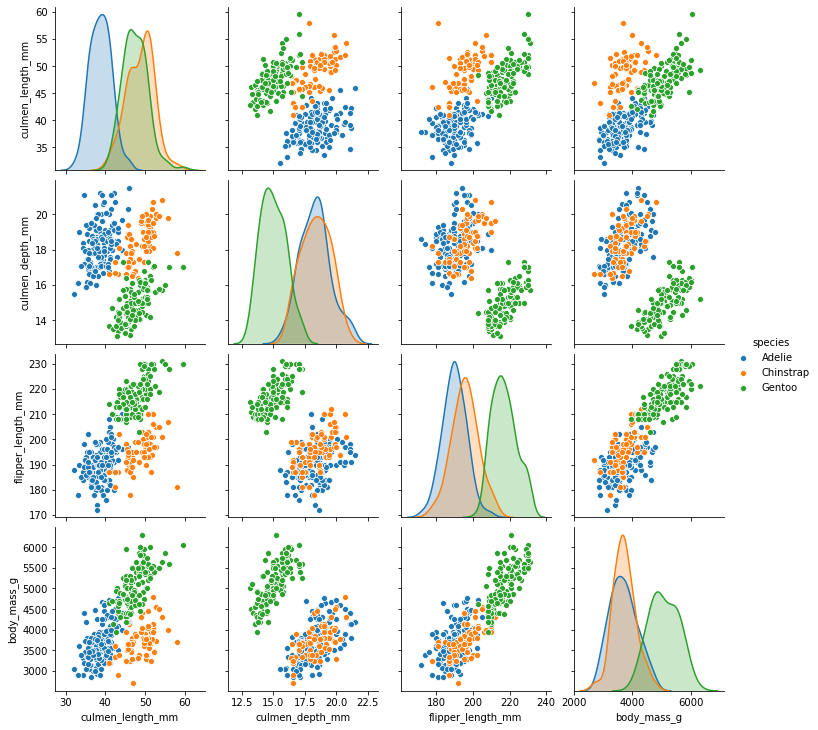

In [19]:
sns.pairplot(df,hue = 'species')

In [23]:
X = pd.get_dummies(df.drop('species',axis = 1),drop_first = True )

In [22]:
y = df['species']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=101)

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
model  = DecisionTreeClassifier()

In [27]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [28]:
base_pred = model.predict(X_test)

In [33]:
from sklearn.metrics import classification_report,plot_confusion_matrix

In [30]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.95      0.91      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.97       101
weighted avg       0.97      0.97      0.97       101



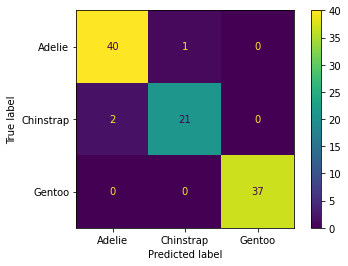

In [34]:
plot_confusion_matrix(model,X_test,y_test)

In [39]:
from sklearn.tree import plot_tree

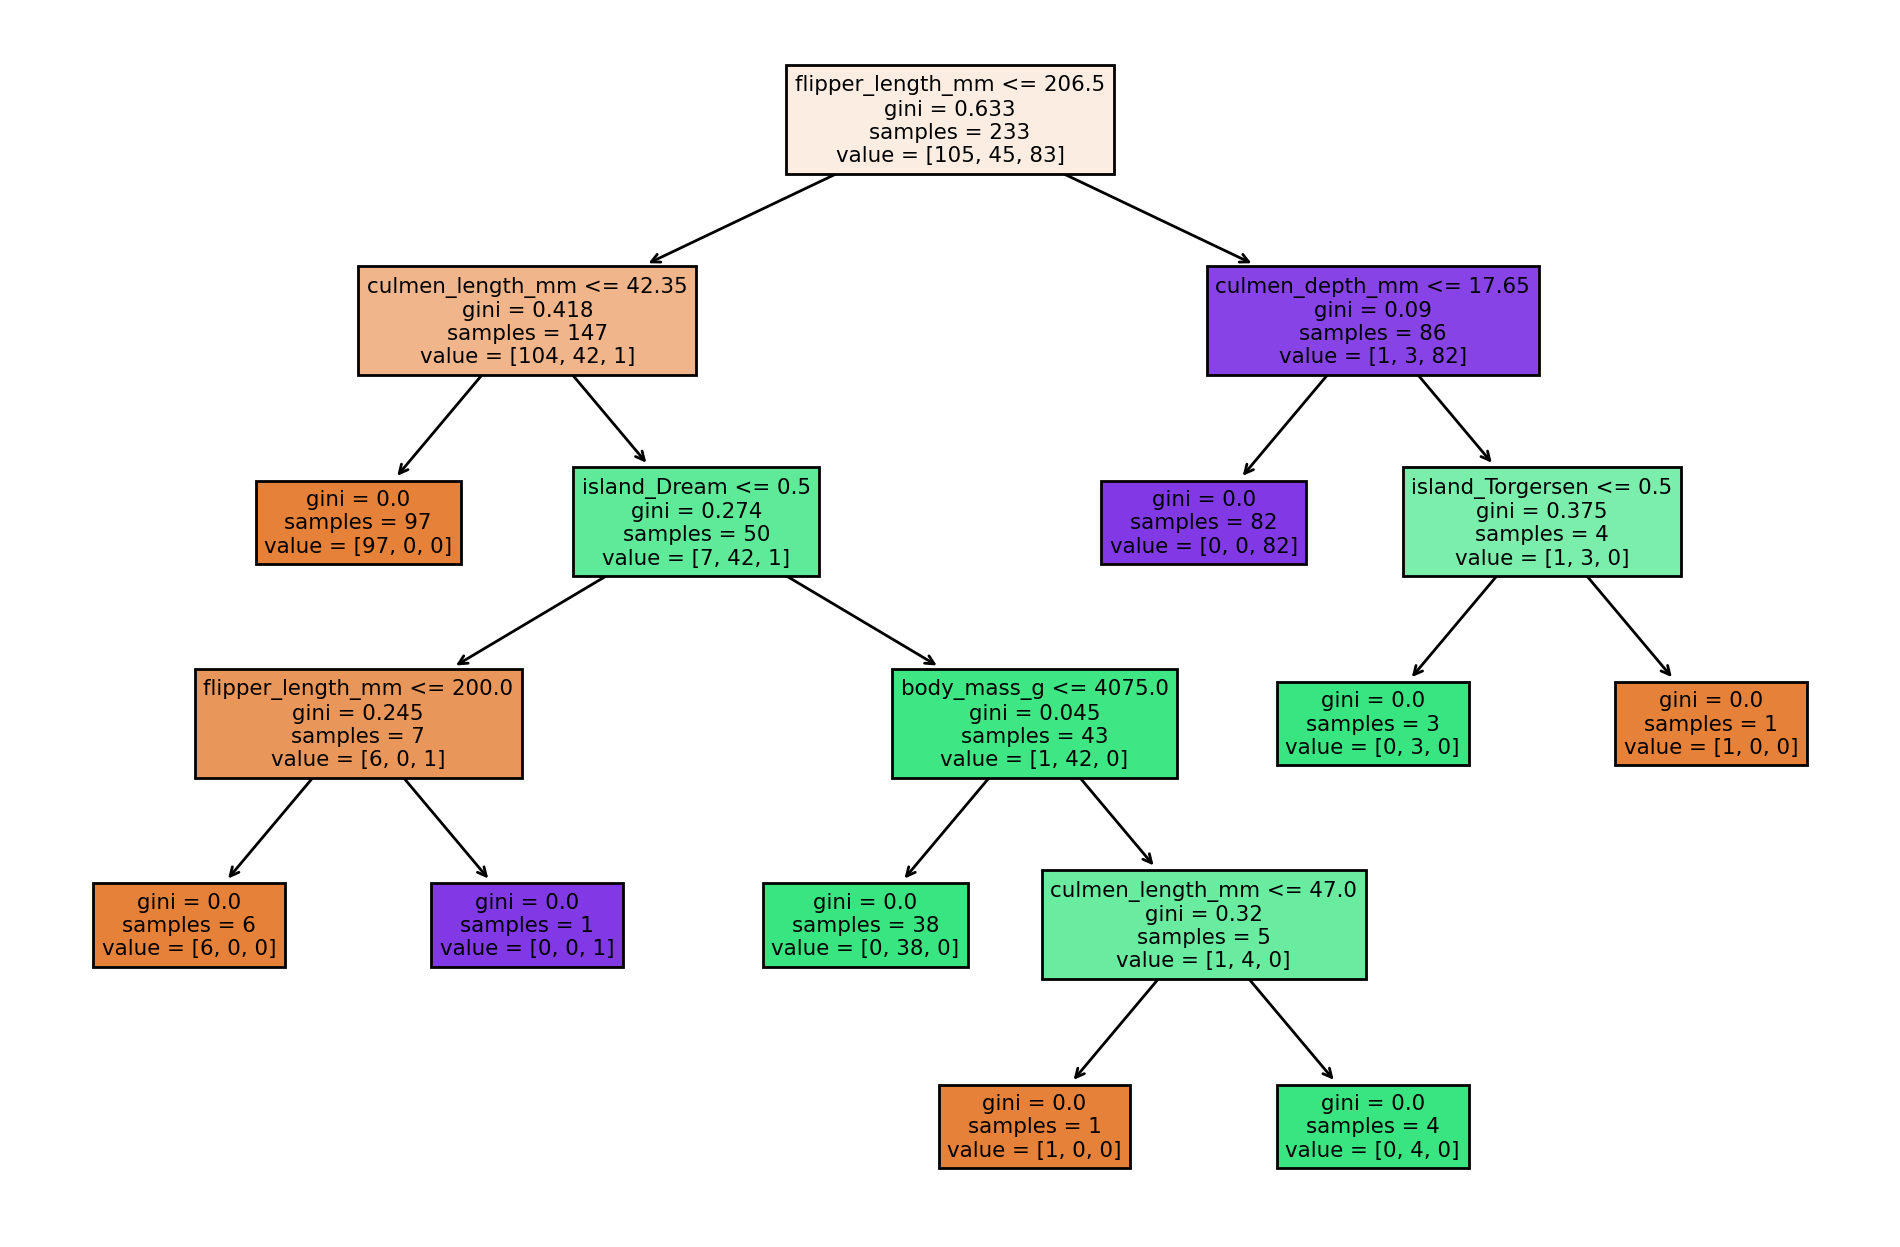

In [41]:
plt.figure(figsize = (12,8),dpi = 200)
plot_tree(model,filled=True,feature_names=X_train.columns);

In [46]:
df.groupby('sex').describe().transpose()#['FEMALE']

sex                           FEMALE         MALE
culmen_length_mm  count   166.000000   168.000000
                  mean     42.111446    45.854762
                  std       4.892151     5.366896
                  min      32.100000    34.600000
                  25%      37.625000    40.975000
                  50%      42.850000    46.800000
                  75%      46.175000    50.325000
                  max      58.000000    59.600000
culmen_depth_mm   count   166.000000   168.000000
                  mean     16.421084    17.891071
                  std       1.791116     1.863351
                  min      13.100000    14.100000
                  25%      14.525000    16.075000
                  50%      17.000000    18.450000
                  75%      17.800000    19.250000
                  max      20.700000    21.500000
flipper_length_mm count   166.000000   168.000000
                  mean    197.481928   204.505952
                  std      12.555681    14.547876
                  min     172.000000   178.000000
                  25%     187.000000   193.000000
                  50%     193.000000   200.500000
                  75%     210.000000   219.000000
                  max     222.000000   231.000000
body_mass_g       count   166.000000   168.000000
                  mean   3868.373494  4545.684524
                  std     668.785470   787.628884
                  min    2700.000000  3250.000000
                  25%    3350.000000  3900.000000
                  50%    3662.500000  4300.000000
                  75%    4568.750000  5312.500000
                  max    5200.000000  6300.000000

In [49]:
def model_info(model):
    '''
        Function to print the classification report
        of a tree model for classification tasks and draw out the tree
        
    '''
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    print(classification_report(y_test,preds))
    print('/n')
    plt.figure(figsize = (12,8),dpi = 200)
    plot_tree(model,filled=True,feature_names=X_train.columns);

              precision    recall  f1-score   support

      Adelie       0.95      1.00      0.98        41
   Chinstrap       1.00      0.91      0.95        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.97      0.98       101
weighted avg       0.98      0.98      0.98       101

/n


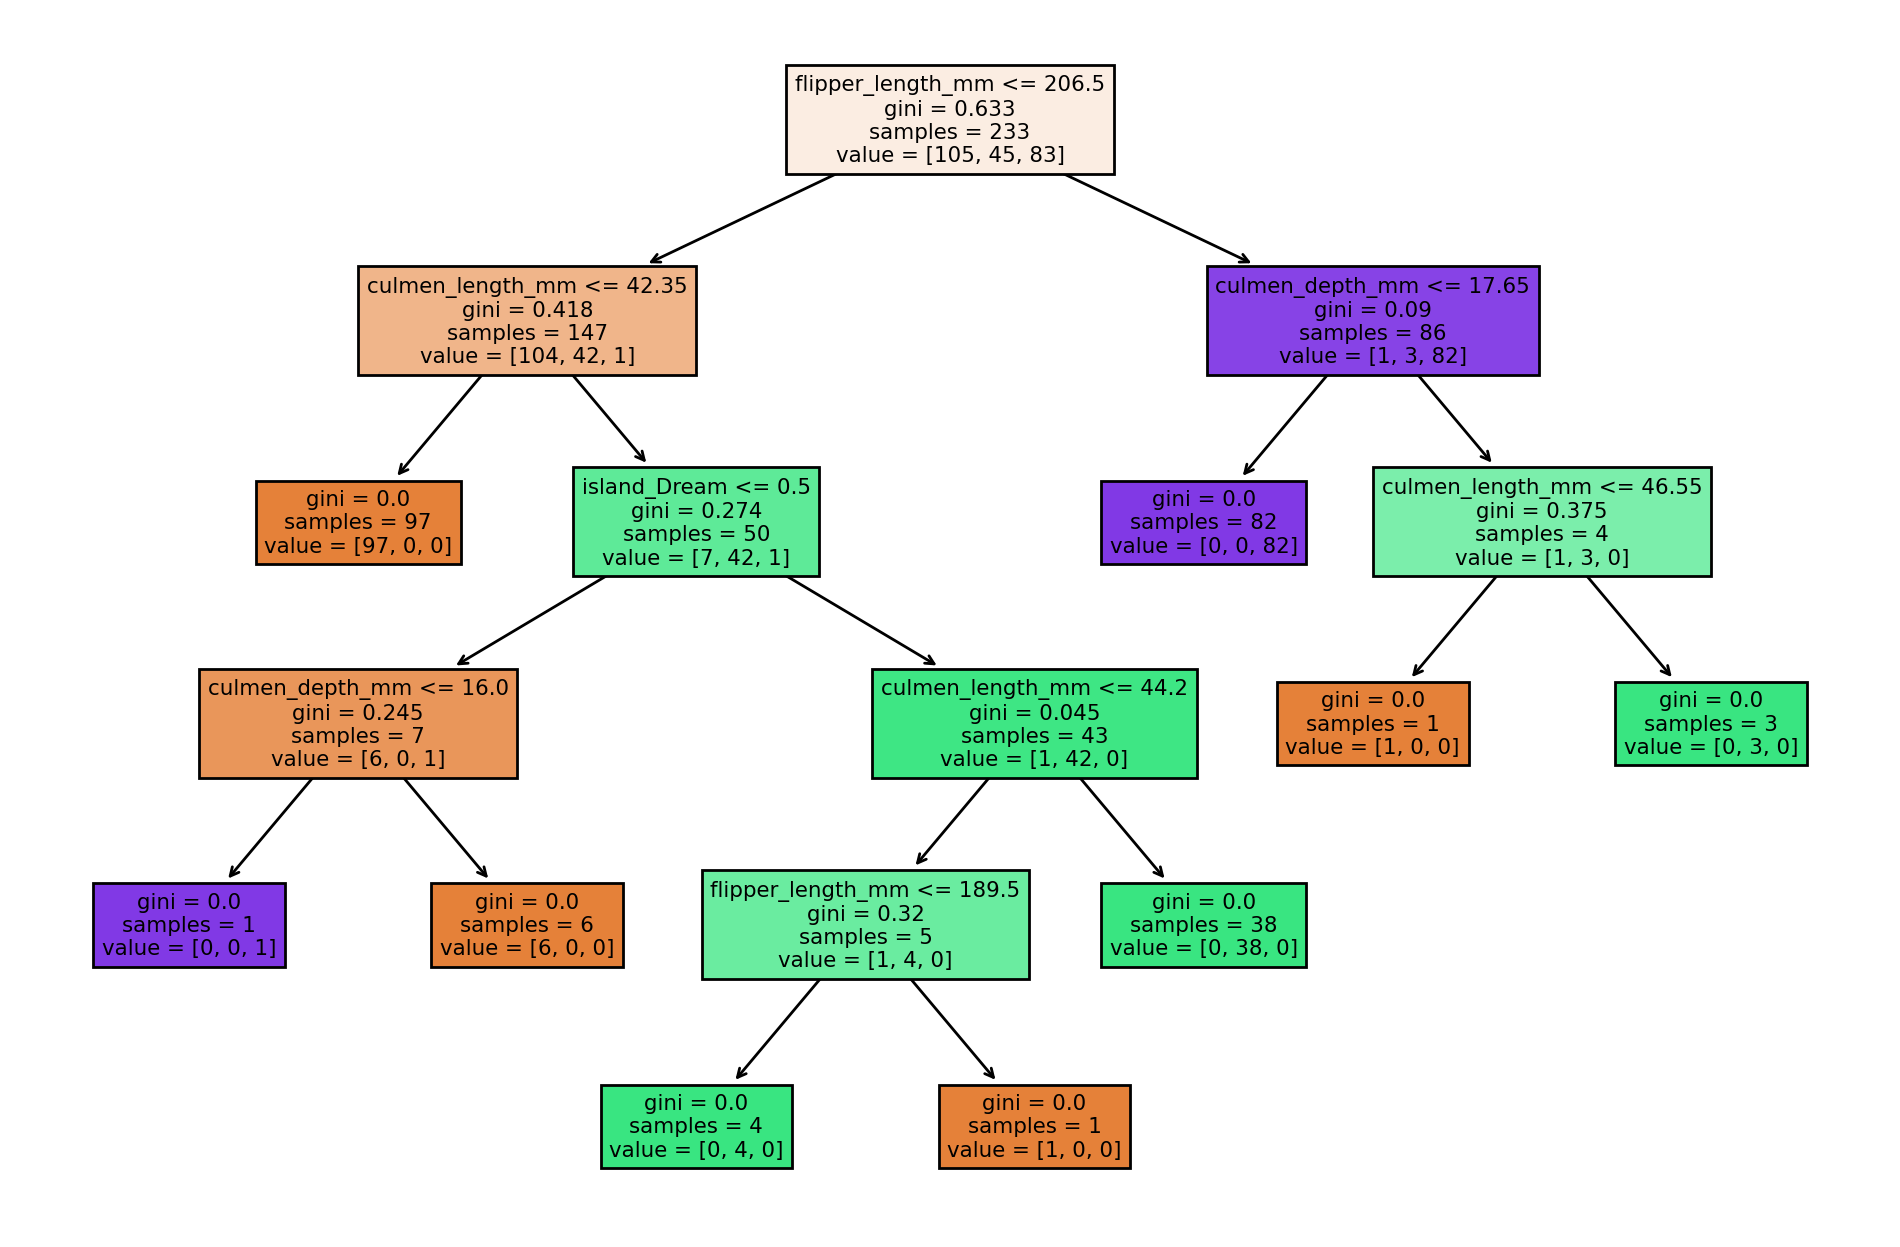

In [48]:
model_info(model)